In [6]:
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)


      Kod Kapanış (TL)   F/K FD/FAVÖK FD/Satışlar  PD/DD Son Dönem Risk Analizi
0   SNGYO          266   1.5      A/D         A/D    0.5    3/2023     Çok Ucuz
1   SKBNK          251   2.4      A/D         A/D    0.6    3/2023     Çok Ucuz
2   AKBNK         1839   1.5      A/D         A/D    0.6    3/2023     Çok Ucuz
3   ISCTR         1328   1.8      A/D         A/D    0.6    3/2023     Çok Ucuz
4   AYDEM         1417  34.1       77          57    0.6    3/2023     Çok Ucuz
5   GARAN         2998   1.9      A/D         A/D    0.7    3/2023     Çok Ucuz
6   GSDHO          329   2.6      A/D         A/D    0.7    3/2023     Çok Ucuz
7   ISGYO          948   1.1      A/D         A/D    0.7    3/2023     Çok Ucuz
8   ZOREN          518   8.1       90          13    0.7    3/2023     Çok Ucuz
9   VAKBN         1008   3.5      A/D         A/D    0.7    3/2023     Çok Ucuz
10  AKFGY          393   1.7      A/D         A/D    0.7    3/2023     Çok Ucuz
11  YKBNK         1211   1.8      A/D   

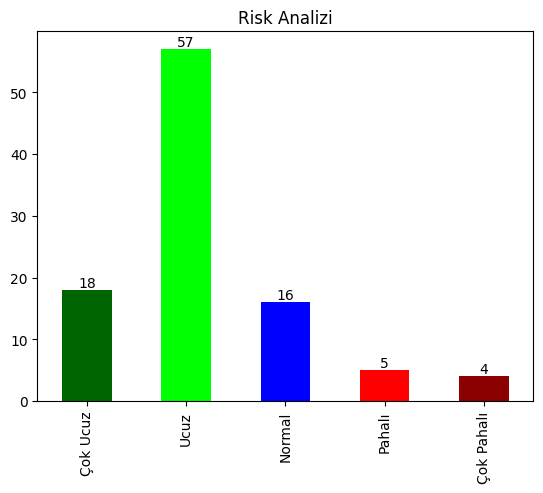

   Menkul   Fiyat     %     Zaman
0    TMSN   61.30  5.69  13:47:52
1   ALFAS  389.80  5.41  13:47:52
2   BAGFS   26.36  3.86  13:47:53
3   FENER   57.05  3.73  13:47:53
4   SKBNK    2.60  3.59  13:47:48
5   ULUUN   26.70  3.57  13:47:50
6   ISCTR   13.71  3.24  13:47:54
7    TSKB    4.60  2.91  13:47:54
8   YYLGD   26.34  2.89  13:47:32
9   GARAN   30.82  2.80  13:47:54
10  GENIL   43.28  2.75  13:44:36
11  YKBNK   12.43  2.64  13:47:53
12  KRDMD   20.78  2.57  13:47:53
13  TOASO  227.50  2.48  13:47:44
14  AKBNK   18.82  2.34  13:47:53
15  KERVT    8.87  2.31  13:46:50
16  VAKBN   10.31  2.28  13:47:51
17  BUCIM    6.16  2.16  13:47:45
18  TKFEN   34.98  2.10  13:47:51
19  OTKAR  198.00  1.96  13:47:51
20  HALKB   13.59  1.87  13:47:52
21  IZMDC    5.55  1.65  13:47:49
22  PSGYO    7.03  1.59  13:47:54
23  AKFGY    3.98  1.27  13:47:17
24  GESAN   60.65  1.25  13:47:31
25  VESBE   12.18  1.16  13:47:51
26  ISGYO    9.59  1.16  13:47:30
27  SNGYO    2.69  1.13  13:47:51
28  CIMSA  113

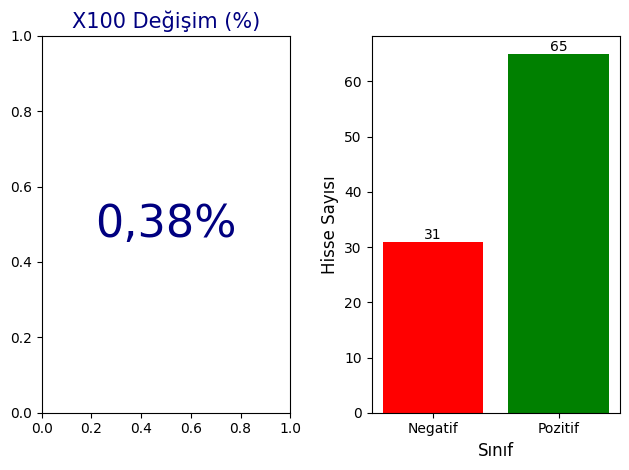

C:\Users\bogaco\AppData\Local\Temp\ipykernel_23696\2954116823.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_neg["Menkul"] = most_neg["Menkul"].reset_index(drop=True)
C:\Users\bogaco\AppData\Local\Temp\ipykernel_23696\2954116823.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_neg["%"] = most_neg["%"].reset_index(drop=True)


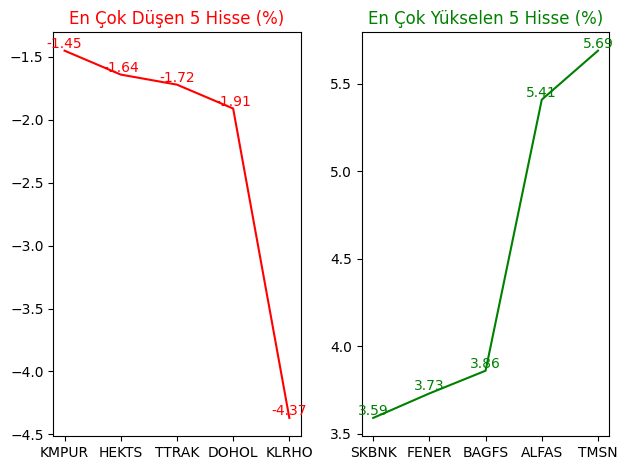

   Menkul  Portföy Yüzdesi   Fiyat     %     Zaman    Kod Kapanış (TL)   F/K FD/FAVÖK FD/Satışlar  PD/DD Son Dönem Risk Analizi    Fark
0   ENKAI             0.10   29.60  0.61  13:47:50  ENKAI         2942  28.2       96          19    1.4    3/2023         Ucuz  0.0610
1   ASELS             0.06   54.30  0.00  13:47:54  ASELS         5430   9.9      126          33    3.0    3/2023         Ucuz  0.0000
2   SAHOL             0.07   43.64  0.28  13:47:21  SAHOL         4352   2.1      A/D         A/D    0.9    3/2023     Çok Ucuz  0.0196
3   KCHOL             0.07  100.80  0.80  13:47:51  KCHOL        10000   3.2      A/D         A/D    1.6    3/2023         Ucuz  0.0560
4    SISE             0.07   45.10 -1.40  13:47:53   SISE         4574   7.7       82          17    1.8    3/2023         Ucuz -0.0980
5   TUPRS             0.07   77.75  0.39  13:47:52  TUPRS         7745   3.2       22          03    2.4    3/2023         Ucuz  0.0273
6   PETKM             0.07   15.19 -0.72  13:47:

KeyboardInterrupt: 

In [7]:
def html_read(url):
    table = pd.read_html(url)
    return table

def run_code():
   
    f_k = html_read("https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=01#page-5")
    fiyat_kazanc = f_k[6]
    fiyat_kazanc["PD/DD"] = pd.to_numeric(fiyat_kazanc["PD/DD"], errors="coerce") / 10
    fiyat_kazanc["F/K"] = pd.to_numeric(fiyat_kazanc["F/K"], errors="coerce") / 10
    fiyat_kazanc["Risk Analizi"] = ['Çok Pahalı' if x > 20 else "Pahalı" if x > 12 else "Normal" if x > 4 else "Ucuz" if x > 1 else 'Çok Ucuz' for x in fiyat_kazanc['PD/DD']]
    fiyat_kazanc = fiyat_kazanc.sort_values("PD/DD")
    fiyat_kazanc = fiyat_kazanc.reset_index(drop=True)


 
    
    tables=html_read("https://uzmanpara.milliyet.com.tr/canli-borsa/")
    combined_table=pd.concat([tables[1],tables[2],tables[3]])

    combined_table['%'] = combined_table['%'].astype("float")/100
    combined_table=combined_table.sort_values("%",ascending=False)
    combined_table=combined_table.drop("Unnamed: 1",axis=1)
    combined_table=combined_table.reset_index(drop=True)
    combined_table['Fiyat'] =pd.to_numeric(combined_table["Fiyat"],errors="coerce")
    combined_table['Fiyat'] = combined_table['Fiyat']/100


    print(fiyat_kazanc,"\n")
   
   
    positives=combined_table[combined_table["%"]>0]
    negatives=combined_table[combined_table["%"]<0]
    risk_sayisi = fiyat_kazanc['Risk Analizi'].value_counts()
    risk_sayisi = risk_sayisi.reindex(['Çok Ucuz', 'Ucuz',"Normal","Pahalı", 'Çok Pahalı'])
    grafik=risk_sayisi.plot(kind="bar",color=["#006400","#00FF00","Blue","#FF0000","#8B0000"])
    plt.title("Risk Analizi")
    for i, v in enumerate(risk_sayisi):
        grafik.text(i, v, str(v), ha='center', va='bottom')
    
    plt.show()  
    print(combined_table)
    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, str(tables[0][1][0].strip(": ")), fontsize=32, ha='center', va='center',color="navy")
    plt.title("X100 Değişim (%)", color='navy',fontsize=15)


    data = {'Sınıf': ['Negatif', 'Pozitif'],"Hisse Sayısı":[negatives.count()[0],positives.count()[0]]}

    Hisse_Tablo=pd.DataFrame(data)
    plt.subplot(1, 2, 2)
    plt.bar(Hisse_Tablo["Sınıf"],Hisse_Tablo["Hisse Sayısı"],color=['red', 'green'])
    plt.xlabel('Sınıf',fontsize=12)
    plt.ylabel('Hisse Sayısı',fontsize=12)
    for i in range(len(Hisse_Tablo["Sınıf"])):
        plt.annotate(str(Hisse_Tablo["Hisse Sayısı"][i]), xy=(Hisse_Tablo["Sınıf"][i], Hisse_Tablo["Hisse Sayısı"][i]), xytext=(Hisse_Tablo["Sınıf"][i], Hisse_Tablo["Hisse Sayısı"][i]),
                    ha='center', va='bottom',color="black",fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

    most_neg=combined_table.tail(5)
    most_neg.reset_index(drop=True, inplace=True)
    most_neg["Menkul"] = most_neg["Menkul"].reset_index(drop=True)
    most_neg["%"] = most_neg["%"].reset_index(drop=True)
    plt.subplot(1, 2, 1)
    plt.title("En Çok Düşen 5 Hisse (%)", color='red',fontsize=12)
    plt.plot(most_neg["Menkul"],most_neg["%"],color="red")
    for i in range(len(most_neg["Menkul"])):
        plt.annotate(str(most_neg["%"][i]), xy=(most_neg["Menkul"][i], most_neg["%"][i]), xytext=(most_neg["Menkul"][i], most_neg["%"][i]),
                    ha='center', va='bottom',color="red")
    
    most_pos=combined_table.head(5).sort_values("%")
    plt.subplot(1, 2, 2)
    plt.title("En Çok Yükselen 5 Hisse (%)", color='green',fontsize=12)
    plt.plot(most_pos["Menkul"],most_pos["%"],color="green")
    for i in range(len(most_pos["Menkul"])):
        plt.annotate(str(most_pos["%"][i]), xy=(most_pos["Menkul"][i], most_pos["%"][i]), xytext=(most_pos["Menkul"][i], most_pos["%"][i]),
                    ha='center', va='bottom',color="green")

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

    
    portfoy=pd.DataFrame({"Menkul":["ENKAI","ASELS","SAHOL","KCHOL","SISE","TUPRS","PETKM","TOASO","YKBNK","KRDMD","VESBE","TAVHL","THYAO","BIMAS"],"Portföy Yüzdesi":[0.1,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07]})
    portfoy_m=pd.merge(portfoy,combined_table,how="left",on="Menkul")
    portfoy_m=pd.merge(portfoy_m,fiyat_kazanc,how="left",left_on="Menkul",right_on="Kod")
    portfoy_m.drop("Kod",axis=1)
    portfoy_m.sort_values("%")
    portfoy_m.reset_index(drop=True)
    
    portfoy_m["Fark"]=portfoy_m["Portföy Yüzdesi"]*portfoy_m["%"]
    toplam=portfoy_m["Fark"].sum()
    print(portfoy_m)
    print("\n\nPortföyün Günlük Değişimi: %",toplam)

   
    print()
   

while True:
  
    run_code()
    print("Kodun çalıştırıldığı tarih:",datetime.now(),"\n\n\n")
    time.sleep(10)  # Her 10 saniyede bir bekle
    clear_output(wait=True)
